In [1]:
import os 
import numpy as np
import torch
from utils1 import * 
import h5py
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
# os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.pyplot import savefig
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import h5py
import pandas as pd
from tqdm import tqdm

import random
import numpy as np
from PIL import Image  
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import precision_score, recall_score, f1_score


2023-10-05 02:11:05.347450: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-05 02:11:05.397871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 02:11:06.293471: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def imgs_input_fn(images):
    img_size = (224, 224, 3)
    images = tf.convert_to_tensor(value = images)
    images = tf.image.resize(images, size=img_size[:2])
    return images

def evaluate_and_plot(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')

    # Plot the confusion matrix
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not bk", "bk"],
                yticklabels=["Not bk", "bk"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix');
    # print("Confusion Matrix:")
    # print(conf_matrix)
    # print("\nClassification Report:")
    # print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")

def load_hdf5_data_cust(file_path):
    with h5py.File(file_path, 'r') as h5_file:
        images = np.array(h5_file['image'])
        labels = np.array(h5_file['label'])    
    print("Images shape: ", images.shape) #, 'Images dtype: ', images.dtype)
    print("Labels shape: ", labels.shape) #, 'Labels dtype: ', labels.dtype)
    return images, labels

def tts_india():
    file_path = ind_data # replace with the path to the dataset
    
    X_train, Y_train = load_hdf5_data(file_path)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=0)
    X_train, X_pool, Y_train, Y_pool = train_test_split(X_train, Y_train, test_size=0.99, stratify = Y_train, random_state=0)
  
    X_train = np.array(imgs_input_fn(X_train))
    X_pool = np.array(imgs_input_fn(X_pool))
    X_test = np.array(imgs_input_fn(X_test))

    return X_train, X_pool, X_test, Y_train, Y_pool, Y_test


def resnet_model(learning_rate=0.00002):
    # load model
    model = models.Sequential()
    conv_base = ResNet50(weights = 'imagenet', include_top=False, input_shape=(224, 224, 3))
    conv_base.trainable = False # not fine tuning 
    model.add(conv_base)
    
    model.add(layers.AveragePooling2D(pool_size=(7,7)))
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
    	      optimizer=Adam(learning_rate=learning_rate), metrics=['acc'])
    return model
    

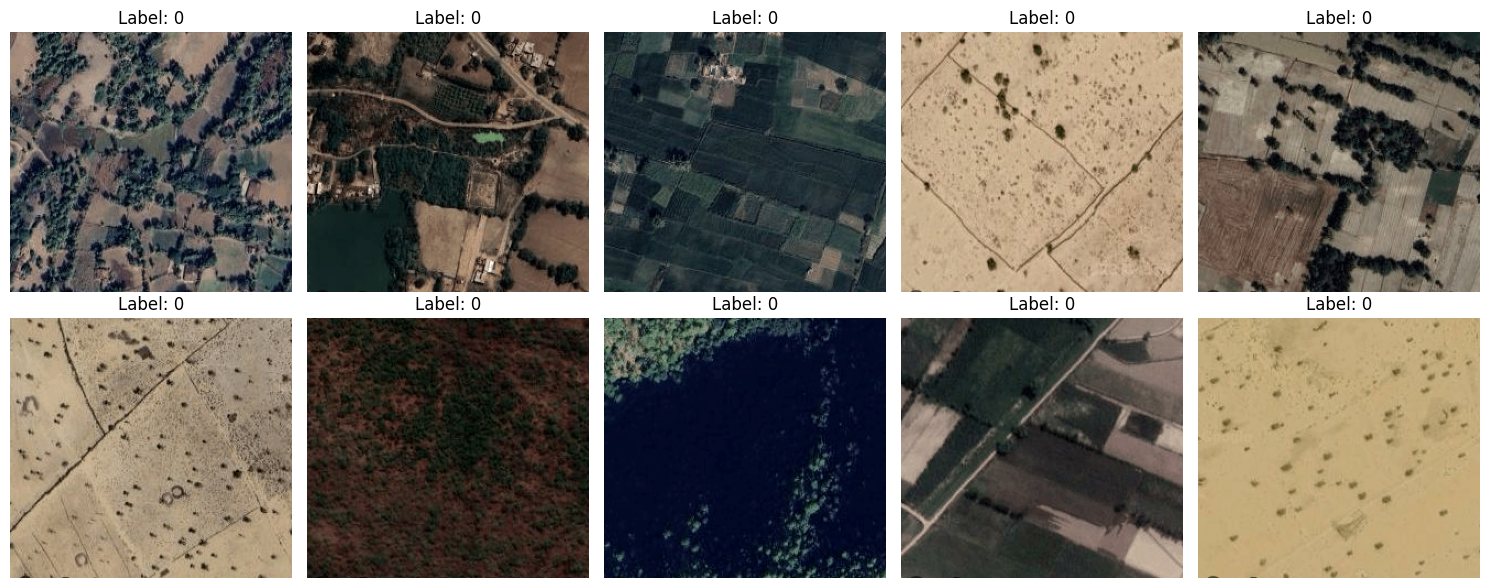

In [3]:
ind_data ='/home/rishabh.mondal/Indian_dataset.h5'
show_random_images_with_labels(ind_data, num_images=10)

In [4]:
X_train, X_pool, X_test, Y_train, Y_pool, Y_test = tts_india()
print("X_train shape: ", X_train.shape)
print("X_pool shape: ", X_pool.shape)
print("X_test shape: ", X_test.shape)
print("Y_train: ", Y_train)


Images shape:  (2758, 236, 256, 3)
Labels shape:  (2758,)


2023-10-05 02:11:09.198886: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


X_train shape:  (22, 224, 224, 3)
X_pool shape:  (2184, 224, 224, 3)
X_test shape:  (552, 224, 224, 3)
Y_train:  [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]


In [5]:
# model = resnet_model(learning_rate=0.00002)
# model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=0)
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred)
# evaluate_and_plot(Y_test, y_pred)

# pool_predictions = model.predict(X_pool)
# positive_predictions = []
# positive_predictions = pool_predictions[pool_predictions > 0.5]
# print("Number of positive predictions: ", len(positive_predictions))
# selected_indices=np.argmin(positive_predictions)
# selected_images = X_pool[selected_indices][np.newaxis, :]
# selected_indices = Y_pool[selected_indices]
# X_train = np.concatenate((X_train, selected_images), axis=0)
# Y_train = np.append(Y_train, selected_indices)
# selected_indices = selected_indices.astype(int)
# X_pool = np.delete(X_pool, selected_indices, axis=0)
# Y_pool = np.delete(Y_pool, selected_indices, axis=0)

# print("X_train shape: ", X_train.shape)
# print("Y_train shape: ", Y_train.shape)
# print("X_pool shape: ", X_pool.shape)
# print("Y_pool shape: ", Y_pool.shape)


Iteration 1
18/18 [==============================] - 11s 572ms/step
Accuracy: 0.8876811594202898
Precision: 0.9174311926605505
Recall: 0.6535947712418301
F1 Score: 0.7633587786259541
69/69 [==============================] - 40s 577ms/step
Number of positive predictions:  408
X_train shape:  (23, 224, 224, 3)
Y_train shape:  (23,)
X_pool shape:  (2183, 224, 224, 3)
Y_pool shape:  (2183,)
Iteration 2
18/18 [==============================] - 11s 581ms/step
Accuracy: 0.9003623188405797
Precision: 0.8951612903225806
Recall: 0.7254901960784313
F1 Score: 0.8014440433212996
69/69 [==============================] - 43s 621ms/step
Number of positive predictions:  436
X_train shape:  (24, 224, 224, 3)
Y_train shape:  (24,)
X_pool shape:  (2182, 224, 224, 3)
Y_pool shape:  (2182,)
Iteration 3
18/18 [==============================] - 10s 578ms/step
Accuracy: 0.9021739130434783
Precision: 0.9090909090909091
Recall: 0.7189542483660131
F1 Score: 0.8029197080291971
69/69 [==============================

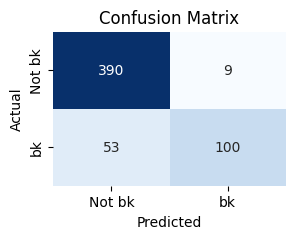

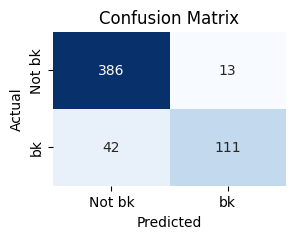

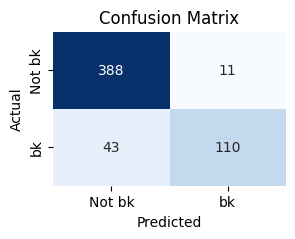

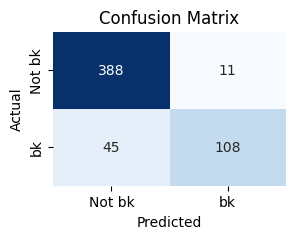

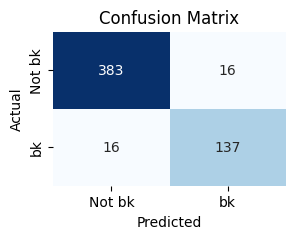

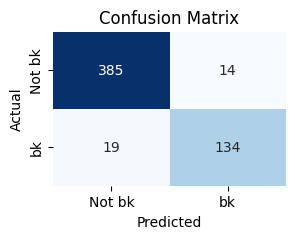

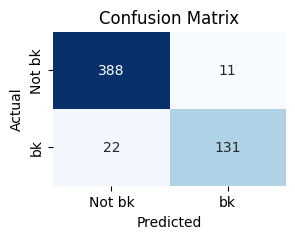

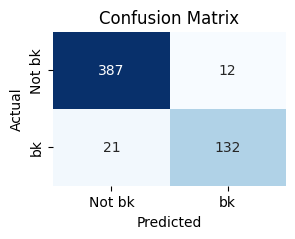

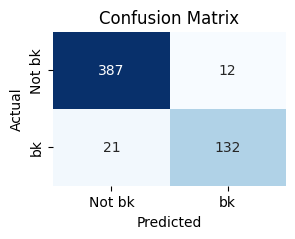

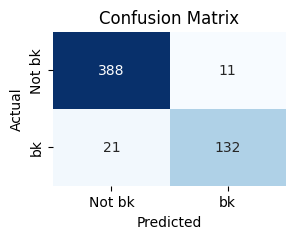

In [6]:

# Assuming you have a function 'resnet_model' that initializes your ResNet model.
# Initialize your model.
model = resnet_model(learning_rate=0.00002)

# Initialize lists to store metrics.
test_loss_list = []
test_accuracy_list = []

# Number of iterations.
num_iterations = 10

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}")

    # Train the model on the labeled data.
    model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=0)

    # Evaluate the model on the test set.
    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    evaluate_and_plot(Y_test, y_pred)
    
    # Make predictions on the pool of unlabeled samples.
    pool_predictions = model.predict(X_pool)

    # Select samples from the pool based on predictions.
    positive_predictions = pool_predictions[pool_predictions > 0.5]
    print("Number of positive predictions: ", len(positive_predictions))
    
    # Find the index of the sample with the highest positive prediction.
    selected_index = np.argmin(positive_predictions)
    
    # Get the selected image and label.
    selected_image = X_pool[selected_index][np.newaxis, :]
    selected_label = Y_pool[selected_index]

    # Add the selected sample to the training dataset.
    X_train = np.concatenate((X_train, selected_image), axis=0)
    Y_train = np.append(Y_train, selected_label)

    # Remove the selected sample from the pool.
    X_pool = np.delete(X_pool, selected_index, axis=0)
    Y_pool = np.delete(Y_pool, selected_index)

    print("X_train shape: ", X_train.shape)
    print("Y_train shape: ", Y_train.shape)
    print("X_pool shape: ", X_pool.shape)
    print("Y_pool shape: ", Y_pool.shape)

# After the loop, you can analyze or visualize the results as needed.


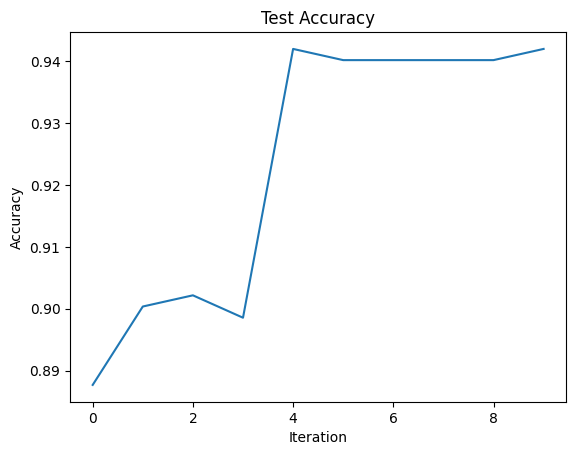

In [7]:
#plot the accuracy
plt.plot(test_accuracy_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Test Accuracy");
